Remember, we are using special package to but significance tests on top of plots using

see: https://github.com/webermarcolivier/statannot

```
pip install statannot

# thenfrom statannot import add_stat_annotation
```

In [34]:
# This allows us to manually edit the code and have it reflected in this notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
pip freeze | grep tifffile

tifffile==0.15.1
Note: you may need to restart the kernel to use updated packages.


In [47]:
# import everything we need

import json # to prettyprint ordereddict

import numpy as np
import pandas as pd # using pd.__version__ == 0.24.2, There are newer versions and things might break!!!

print('pd.__version__:', pd.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, clear_output
import ipywidgets

import tifffile # 20200707, I broke my virtual environment

from samiPostAnalysis import samiPostAnalysis

pd.__version__: 1.0.5


### Create a samiPostAnalysis object with all of our sekelton analysis across groups (wtf, wtm, kof, kom)

This assumes eveything has been processed with samiAnalysis.py

In particular

```
wtfPath = '../analysis/wt-female_results.csv'
kofPath = '../analysis/ko-female_results.csv'
wtmPath = '../analysis/wt-male_results.csv'
komPath = '../analysis/ko-male_results.csv'
```

In [48]:
resultsPath = '/Users/cudmore/Desktop/samiVolume3'
resultsPath = '/Users/cudmore/Desktop/samiVolume4'

spa = samiPostAnalysis(resultsPath)

samiPostAnalysis() is loading analysis files
    loading: /Users/cudmore/Desktop/samiVolume4/wt-female_results.csv
    loading: /Users/cudmore/Desktop/samiVolume4/ko-female_results.csv
    loading: /Users/cudmore/Desktop/samiVolume4/wt-male_results.csv
    loading: /Users/cudmore/Desktop/samiVolume4/ko-male_results.csv
    loading densityResultsPath: /Users/cudmore/Desktop/samiVolume4/density-results.csv


### Run density analysis

This assumes everything has been processed by samiVolume2.py

In [49]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]

df = spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
#spa.densityPlot(pruneDict, 'dErodedToRing') # pass in one of (dFullMask  dErodedMask  dRingMask  dRingVsErodedRatio)
#spa.densityPlot(pruneDict, 'dRingToEroded') # pass in one of (dFullMask  dErodedMask  dRingMask  dRingVsErodedRatio)

display(df.head())
display(df.tail())


,genotype,sex,myCellNumber,branchType,statName,minValue,xVoxel,yVoxel,zVoxel,voxelVolume,...,nPerVolFullMask,nPerVolErodedMask,nPerVolRingMask,nPerVolRingToEroded,nPerVolErodedToRing,mLenPerVolFullMask,mLenPerVolErodedMask,mLenPerVolRingMask,mLenPerVolRingToEroded,mLenPerVolErodedToRing
0,wt,female,0,[2],len3d,1,0.209253,0.209253,0.43,0.018828,...,0.097194,0.172568,0.044937,26.040481,384.017489,0.000589,0.002028,0.001063,52.433826,190.716581
1,wt,female,1,[2],len3d,1,0.089874,0.089874,0.43,0.003473,...,0.174142,0.142538,0.115278,80.874986,123.647626,0.001142,0.003870,0.002159,55.778331,179.281089
2,wt,female,2,[2],len3d,1,0.199193,0.199193,0.43,0.017061,...,0.072614,0.204567,0.024802,12.123997,824.810486,0.000717,0.003545,0.001113,31.380425,318.670001
3,wt,female,3,[2],len3d,1,0.230178,0.230178,0.43,0.022782,...,0.071925,0.156800,0.007995,5.098594,1961.324934,0.000483,0.001289,0.001203,93.267818,107.218119
4,wt,female,4,[2],len3d,1,0.207160,0.207160,0.43,0.018454,...,0.083117,0.166231,0.030070,18.089211,552.815708,0.000673,0.002483,0.001139,45.877659,217.971019


,genotype,sex,myCellNumber,branchType,statName,minValue,xVoxel,yVoxel,zVoxel,voxelVolume,...,nPerVolFullMask,nPerVolErodedMask,nPerVolRingMask,nPerVolRingToEroded,nPerVolErodedToRing,mLenPerVolFullMask,mLenPerVolErodedMask,mLenPerVolRingMask,mLenPerVolRingToEroded,mLenPerVolErodedToRing
129,ko,male,39,[2],len3d,1,0.180139,0.180139,0.43,0.013954,...,0.132413,0.245282,0.029369,11.973377,835.186298,0.000631,0.001892,0.001217,64.297781,155.526363
130,ko,male,40,[2],len3d,1,0.218063,0.218063,0.43,0.020447,...,0.098814,0.250990,0.004838,1.927607,5187.778655,0.000531,0.001498,0.000868,57.965332,172.516912
131,ko,male,41,[2],len3d,1,0.165728,0.165728,0.43,0.011810,...,0.186769,0.222239,0.133408,60.028794,166.586721,0.000694,0.002632,0.001189,45.167127,221.399959
132,ko,male,42,[2],len3d,1,0.207160,0.207160,0.43,0.018454,...,0.099081,0.222576,0.027855,12.514726,799.058674,0.000747,0.002746,0.001200,43.700303,228.831363
133,ko,male,43,[2],len3d,1,0.089874,0.089874,0.43,0.003473,...,0.255726,0.246996,0.198388,80.320537,124.501160,0.000870,0.002363,0.001944,82.286171,121.527103


## Run analysis twice and make two plots

Temporary conclusion is the central/eroded region has higher density than the outer

There is a problem here, my outer mask is going beyond the actual cell boundary. I need to run this multiple times (constructing different mask each time) by setting the threshold distance into euclidean-distrance transform to make outer masks bother farther and close to the actual bounary of the cell.

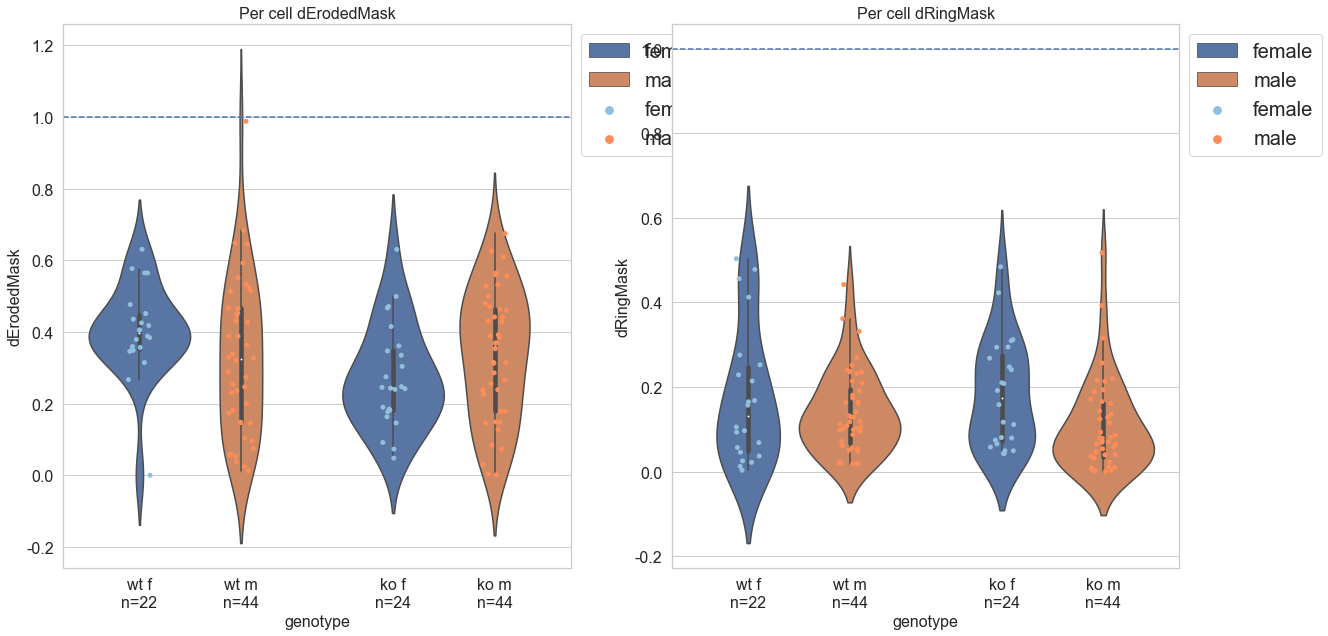

In [50]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(20,10))
axs = np.ravel(axs) # flatten into 1D

#
# 1
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]

spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)

ax = axs[0]
# pruneDict is ONLY used to generate x-axis labels
# pass in one of (dFullMask  dErodedMask  dRingMask  dRingToEroded, dErodedToRing)
spa.densityPlot(pruneDict, 'dErodedMask', ax=ax)

#
# 2
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]

spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)

ax = axs[1]
# pruneDict is ONLY used to generate x-axis labels
# pass in one of (dFullMask  dErodedMask  dRingMask  dRingToEroded, dErodedToRing)
spa.densityPlot(pruneDict, 'dRingMask', ax=ax)


## Run analysis 4 times with different branch/segment parameters

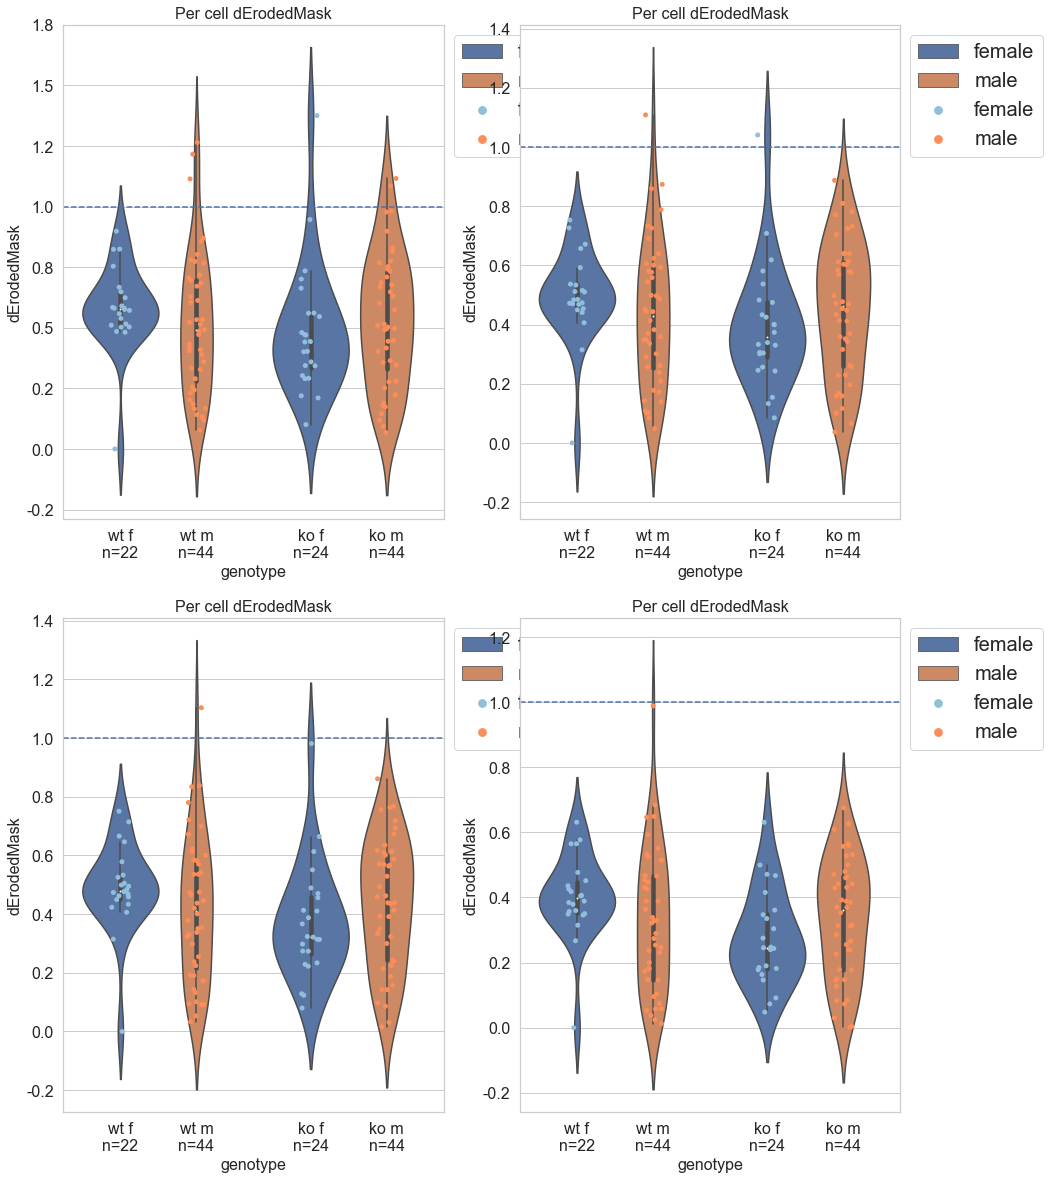

In [52]:
fig, axs = plt.subplots(2, 2, sharey=False, figsize=(15,20))
axs = np.ravel(axs) # flatten into 1D

# chose one of these
myStat = 'dErodedMask'
#myStat = 'dRingMask'
#myStat = 'dRingToEroded'
#myStat = 'dErodedToRing'
#myStat = 'vErodedMask'
#myStat = 'vRingMask'
#myStat = 'dFullMask'

#
# 1
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 0
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[0]
spa.densityPlot(pruneDict, myStat, ax=ax)

#
# 2
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[1]
spa.densityPlot(pruneDict, myStat, ax=ax)

#
# 3
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[2]
spa.densityPlot(pruneDict, myStat, ax=ax)

#
# 4
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[3]
spa.densityPlot(pruneDict, myStat, ax=ax)



In [53]:
# chose one of these
myStat = 'dErodedMask'
#myStat = 'dRingMask'
#myStat = 'dRingToEroded'
#myStat = 'dErodedToRing'
#myStat = 'vErodedMask'
#myStat = 'dFullMask'

#
# 1
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 0
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, myStat)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 2
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, myStat)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 3
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, myStat)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 3
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, myStat)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)


statName: dErodedMask 0 []


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.136366,0.00618607,0.324048
1,"(wt, male)",,0.99667,0.648694,0.649239
2,"(ko, female)",,,0.991769,0.301571
3,"(ko, male)",,,,0.996670


statName: dErodedMask 1 []


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.184762,0.00706485,0.395242
1,"(wt, male)",,0.99667,0.452809,0.584641
2,"(ko, female)",,,0.991769,0.184101
3,"(ko, male)",,,,0.996670


statName: dErodedMask 1 [1, 2]


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.143671,0.00288586,0.317419
1,"(wt, male)",,0.99667,0.393434,0.625407
2,"(ko, female)",,,0.991769,0.148814
3,"(ko, male)",,,,0.996670


statName: dErodedMask 1 [2]


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.0929775,0.00148524,0.167389
1,"(wt, male)",,0.99667,0.415126,0.704159
2,"(ko, female)",,,0.991769,0.179899
3,"(ko, male)",,,,0.996670


## For different sets of parameters compare dRing and/or dEroded within each (genotype, sex)

In [54]:
pruneDict = spa.getDefaultPruneDict()

#
# 1
statName = 'dRingMask'

pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 2
statName = 'dErodedMask'

pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)



statName: dRingMask 1 [2]


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.790819,0.47481,0.101195
1,"(wt, male)",,0.99667,0.240301,0.035830
2,"(ko, female)",,,0.991769,0.009357
3,"(ko, male)",,,,0.996670


statName: dRingMask 1 [1, 2]


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.728696,0.574972,0.065311
1,"(wt, male)",,0.99667,0.148814,0.042145
2,"(ko, female)",,,0.991769,0.005910
3,"(ko, male)",,,,0.996670


statName: dErodedMask 1 [2]


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.0929775,0.00148524,0.167389
1,"(wt, male)",,0.99667,0.415126,0.704159
2,"(ko, female)",,,0.991769,0.179899
3,"(ko, male)",,,,0.996670


statName: dErodedMask 1 [1, 2]


/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/opt/anaconda3/envs/sami_env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.990629,0.143671,0.00288586,0.317419
1,"(wt, male)",,0.99667,0.393434,0.625407
2,"(ko, female)",,,0.991769,0.148814
3,"(ko, male)",,,,0.996670


## get stat tests on plot

see: https://github.com/webermarcolivier/statannot

pip install statannot

In [55]:
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")

### rerun full density analysis

In [56]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1 # print <1 len3d
pruneDict['branchType'] = [1, 2] #[2]
df = spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)


In [57]:
# assuming we ran density analysis all
df = spa.dfDensityAnalysis

display(df.head())
#display(df)

,genotype,sex,myCellNumber,branchType,statName,minValue,xVoxel,yVoxel,zVoxel,voxelVolume,...,nPerVolFullMask,nPerVolErodedMask,nPerVolRingMask,nPerVolRingToEroded,nPerVolErodedToRing,mLenPerVolFullMask,mLenPerVolErodedMask,mLenPerVolRingMask,mLenPerVolRingToEroded,mLenPerVolErodedToRing
0,wt,female,0,"[1, 2]",len3d,1,0.209253,0.209253,0.43,0.018828,...,0.137151,0.214729,0.074073,34.495895,289.889566,0.000603,0.001978,0.001110,56.107403,178.229599
1,wt,female,1,"[1, 2]",len3d,1,0.089874,0.089874,0.43,0.003473,...,0.272692,0.216906,0.194667,89.747255,111.424020,0.001193,0.004031,0.002198,54.519251,183.421449
2,wt,female,2,"[1, 2]",len3d,1,0.199193,0.199193,0.43,0.017061,...,0.111364,0.262528,0.051418,19.585805,510.573864,0.000758,0.003412,0.001365,39.994933,250.031674
3,wt,female,3,"[1, 2]",len3d,1,0.230178,0.230178,0.43,0.022782,...,0.103681,0.207943,0.017766,8.543590,1170.468106,0.000482,0.001249,0.001179,94.349815,105.988549
4,wt,female,4,"[1, 2]",len3d,1,0.207160,0.207160,0.43,0.018454,...,0.130054,0.222820,0.063147,28.339764,352.861090,0.000685,0.002522,0.001227,48.675355,205.442776


        Statistical test to run. Must be one of:
        - `Levene`
        - `Mann-Whitney`
        - `Mann-Whitney-gt`
        - `Mann-Whitney-ls`
        - `t-test_ind`
        - `t-test_welch`
        - `t-test_paired`
        - `Wilcoxon` (requires same number of observations)
        - `Kruskal`


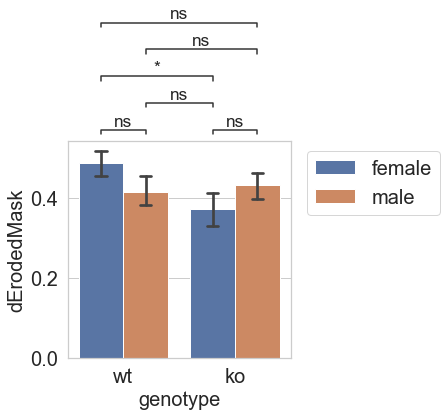

In [61]:
# check volumes
#myStat = 'vFullMask'
#myStat = 'vErodedMask'
#myStat = 'vRingMask'

# 'd' is sum 3d len / vol
myStat = 'dErodedMask' # ko female goes down !
#myStat = 'dRingMask' # no change
#myStat = 'dErodedToRing'
#myStat = 'dRingToEroded'

#myStat = 'nPerVolFullMask'
#myStat = 'nPerVolErodedMask' # ko female goes down !
#myStat = 'nPerVolRingMask'

#myStat = 'nPerVolErodedToRing' # always greater
#myStat = 'nPerVolRingToEroded' # always less than 1 (100)

#myStat = 'mLenPerVolFullMask'
#myStat = 'mLenPerVolErodedMask'
#myStat = 'mLenPerVolRingMask'

#myStat = 'mLenPerVolRingToEroded'
#myStat = 'mLenPerVolErodedToRing'

myStatTest = 'Mann-Whitney' # ('Kruskal', 'Mann-Whitney', 'Mann-Whitney-gt', 't-test_ind')
text_format = 'star' #'simple'

#import matplotlib.pyplot as plt
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

fig, axs = plt.subplots(1, 1, sharey=False, figsize=(4,4))
axs = np.ravel(axs) # flatten into 1D

x = 'genotype'
y = myStat
hue = 'sex'
hue_order=['female', 'male']

box_pairs=[
    (("wt", "female"), ("wt", "male")),
    (("ko", "female"), ("ko", "male")),

    (("wt", "female"), ("ko", "female")),
    (("wt", "male"), ("ko", "male")),

    (("wt", "female"), ("ko", "male")),
    (("wt", "male"), ("ko", "female")),
    ]

# boxplot
#ax = sns.boxplot(data=df, x=x, y=y, hue=hue, ax=axs[0]) # no way to turn off outliers
# bar plot with ALMOST sem
ax = sns.barplot(data=df, x=x, y=y, hue=hue, ax=axs[0], capsize=0.1, ci=68) # CAREFUL, ci=68 ASSUMES A NORMAL DISTRIBUTION
# set verbose >0 to print all stat tests
comparisons_correction = 'bonferroni' # from ('bonferroni', None)
axNew, test_result_list = add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test=myStatTest, comparisons_correction=comparisons_correction,
                    loc='outside', text_format=text_format, fontsize='x-large', verbose=0)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1));
